In [6]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [7]:
# Step 2: Load and Preprocess the Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [8]:
# Normalize pixel values (0–255 → 0–1)
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255

In [9]:
# One-hot encode labels (e.g., 3 → [0,0,0,1,0,0,0,0,0,0])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
# Step 3: Define the ANN Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer (10 digits)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Step 4: Compile the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
# Step 5: Train the Model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8601 - loss: 0.4708 - val_accuracy: 0.9668 - val_loss: 0.1104
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9638 - loss: 0.1189 - val_accuracy: 0.9747 - val_loss: 0.0844
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9760 - loss: 0.0772 - val_accuracy: 0.9773 - val_loss: 0.0777
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9832 - loss: 0.0548 - val_accuracy: 0.9772 - val_loss: 0.0797
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9872 - loss: 0.0400 - val_accuracy: 0.9777 - val_loss: 0.0848
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9899 - loss: 0.0320 - val_accuracy: 0.9780 - val_loss: 0.0784
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9909 - loss: 0.0261 - val_accuracy: 0.9798 - val_loss: 0.0864
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9936 - loss: 0.0198

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.1107
Test Accuracy: 0.9769
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


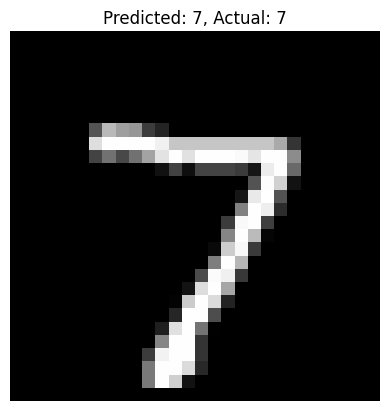

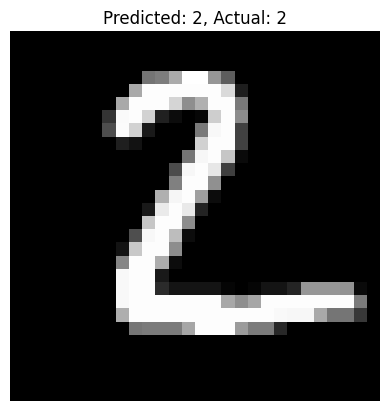

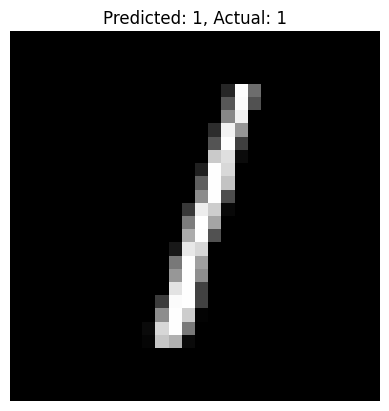

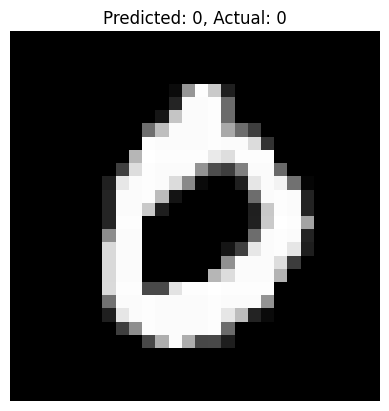

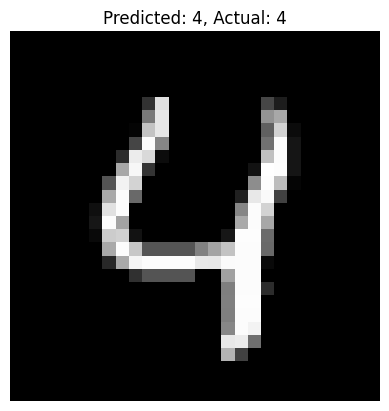

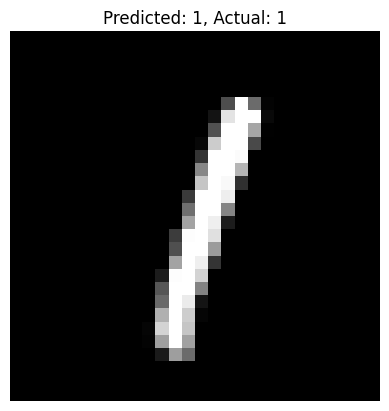

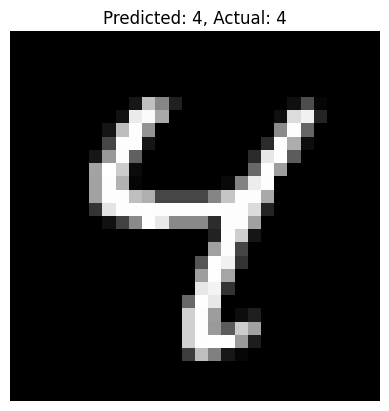

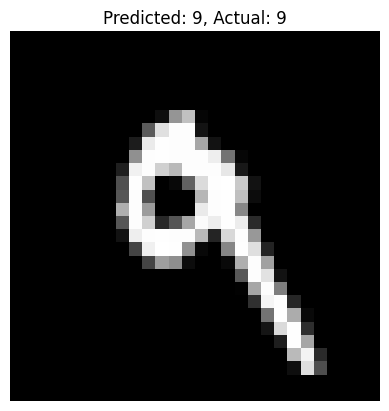

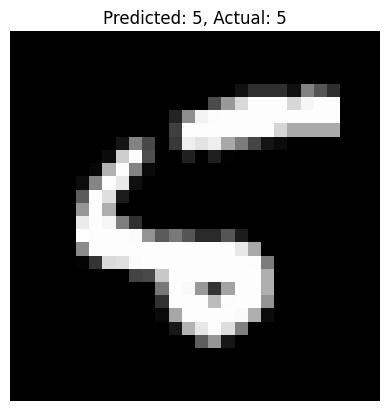

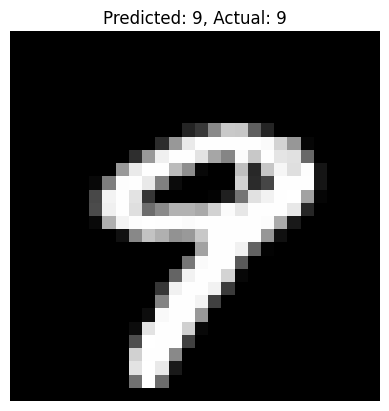

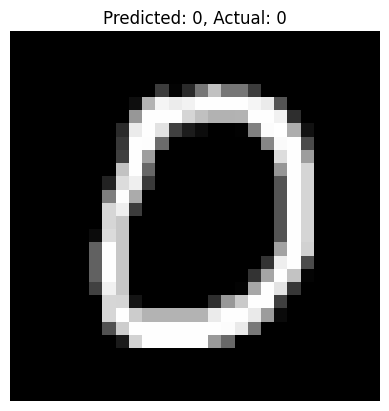

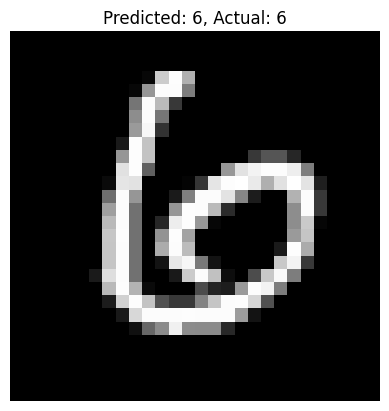

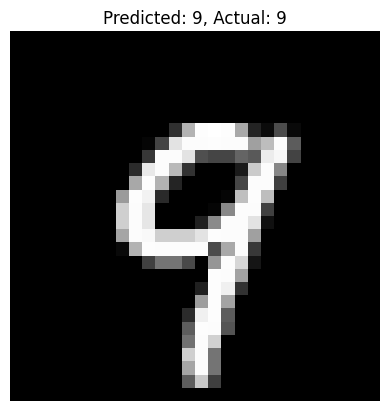

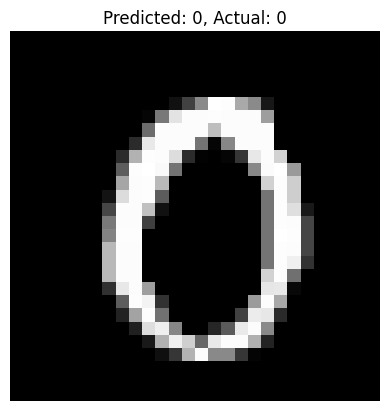

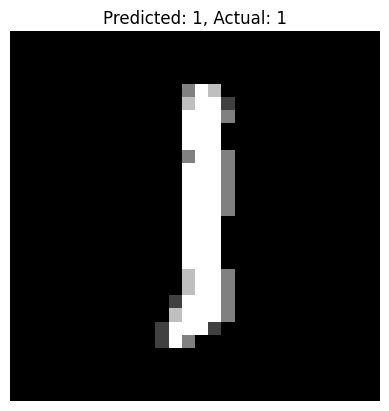

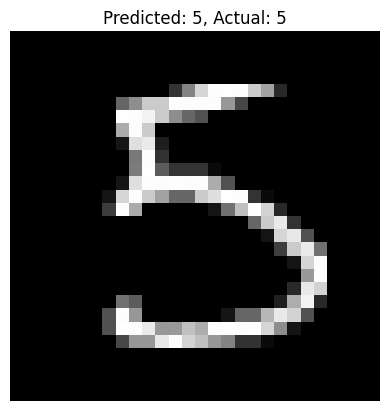

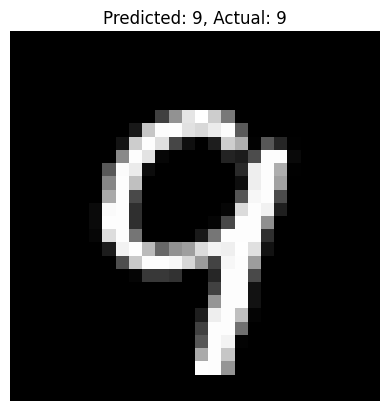

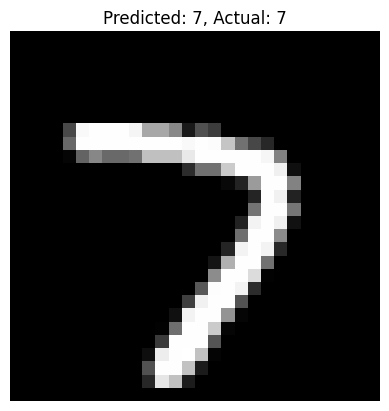

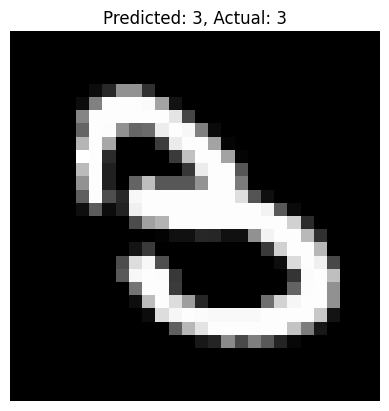

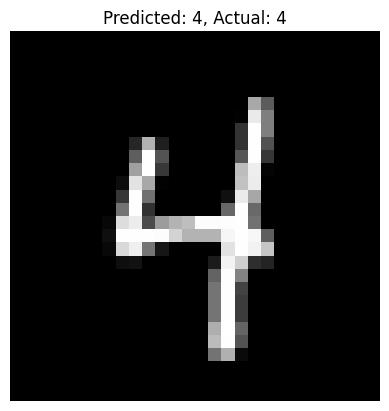

In [15]:
# Step 6: Evaluate the Model on Test Data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Step 7: Predict and Visualize Results
predictions = model.predict(x_test[:20])

for i in range(20):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test[i])}")
    plt.axis('off')
    plt.show()